<a href="https://colab.research.google.com/github/yxrellx/Algoritmos/blob/main/RandomForest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/elinar.csv')
df

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area,quimio_terapia(2),radio_terapia(2)
0,2,43,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positve,...,1,0,0,0,1,1,0,0.000276,SI,SI
1,8,76,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1,Positve,...,0,2,0,1,1,1,1,0.002373,No,SI
2,10,78,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1,Positve,...,0,3,1,0,1,1,1,0.003653,SI,SI
3,28,86,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1,Positve,...,0,2,0,0,0,1,2,0.000916,SI,SI
4,35,84,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,Her2,1,Negative,...,0,1,1,0,0,1,1,0.001644,SI,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,7278,67,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,4,Positve,...,0,1,1,0,1,5,2,0.012834,SI,No
1512,7280,63,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,4,Positve,...,0,3,1,0,1,4,0,0.023726,SI,No
1513,7284,61,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,4,Positve,...,0,10,0,0,0,5,2,0.012834,SI,No
1514,7286,66,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4,Positve,...,0,1,1,0,0,4,2,0.036559,SI,No


In [3]:
df =df.drop(['patient_id','type_of_breast_surgery','cancer_type','cancer_type_detailed',"cellularity","pam50_+_claudin-low_subtype","er_status_measured_by_ihc","er_status", "her2_status_measured_by_snp6", "her2_status", "tumor_other_histologic_subtype", "inferred_menopausal_state","integrative_cluster", "primary_tumor_laterality","oncotree_code","pr_status","3-gene_classifier_subtype", "death_from_cancer","quimio_terapia(2)", "radio_terapia(2)"],axis=1)
df

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
0,43,0,1,3,1,0,2,0.000065,8.466155e-01,1,...,0,0,1,0,0,0,1,1,0,0.000276
1,76,1,1,3,1,8,2,0.000099,4.138046e-01,0,...,0,1,0,2,0,1,1,1,1,0.002373
2,78,0,1,3,1,0,4,0.006730,7.802601e-09,0,...,0,0,0,3,1,0,1,1,1,0.003653
3,86,0,1,3,1,1,5,0.008339,3.657886e-01,0,...,0,0,0,2,0,0,0,1,2,0.000916
4,84,0,1,2,0,0,1,0.005066,3.627876e-01,0,...,0,2,0,1,1,0,0,1,1,0.001644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,67,0,4,2,1,1,3,0.000065,2.410804e-08,0,...,0,0,0,1,1,0,1,5,2,0.012834
1512,63,0,4,2,1,6,6,0.000083,1.955985e-01,1,...,0,0,0,3,1,0,1,4,0,0.023726
1513,61,0,4,3,1,1,5,0.000082,2.030677e-08,0,...,0,0,0,10,0,0,0,5,2,0.012834
1514,66,0,4,3,1,3,2,0.000082,1.586862e-01,0,...,0,0,0,1,1,0,0,4,2,0.036559


In [4]:
X = df.copy()
X = X.drop(['death_from_cancer (2)'], axis=1)
X

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,her2_status_measured_by_snp6 (2),her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),tumor_area
0,43,0,1,3,1,0,2,0.000065,8.466155e-01,1,...,0,0,0,1,0,0,0,1,1,0.000276
1,76,1,1,3,1,8,2,0.000099,4.138046e-01,0,...,0,0,1,0,2,0,1,1,1,0.002373
2,78,0,1,3,1,0,4,0.006730,7.802601e-09,0,...,0,0,0,0,3,1,0,1,1,0.003653
3,86,0,1,3,1,1,5,0.008339,3.657886e-01,0,...,2,0,0,0,2,0,0,0,1,0.000916
4,84,0,1,2,0,0,1,0.005066,3.627876e-01,0,...,1,0,2,0,1,1,0,0,1,0.001644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,67,0,4,2,1,1,3,0.000065,2.410804e-08,0,...,0,0,0,0,1,1,0,1,5,0.012834
1512,63,0,4,2,1,6,6,0.000083,1.955985e-01,1,...,0,0,0,0,3,1,0,1,4,0.023726
1513,61,0,4,3,1,1,5,0.000082,2.030677e-08,0,...,0,0,0,0,10,0,0,0,5,0.012834
1514,66,0,4,3,1,3,2,0.000082,1.586862e-01,0,...,0,0,0,0,1,1,0,0,4,0.036559


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['death_from_cancer (2)'],
                                                    test_size=0.2, random_state=42
                                                    )

In [6]:
X_train

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,her2_status_measured_by_snp6 (2),her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),tumor_area
1280,38,0,5,2,1,0,2,0.005032,1.940313e-01,1,...,1,0,0,1,0,0,0,1,5,0.007782
1334,49,0,5,3,0,0,7,0.006704,1.478159e-01,0,...,2,0,0,1,8,1,0,0,5,0.023686
601,51,0,2,3,1,0,6,0.000065,2.280760e-08,1,...,0,0,0,0,0,1,0,1,5,0.000428
590,51,1,2,3,0,2,8,0.000084,3.804602e-01,0,...,2,0,6,0,8,0,0,0,4,0.004800
718,44,0,3,1,1,0,4,0.003643,1.983995e-01,0,...,0,0,2,1,0,0,2,1,5,0.005953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,80,0,3,3,1,2,2,0.000082,3.181060e-09,0,...,0,0,0,0,2,1,0,0,4,0.001766
1294,64,0,5,2,0,0,1,0.000049,2.550183e-01,1,...,0,0,6,0,7,1,0,0,0,0.015067
860,46,0,3,3,0,0,5,0.000065,1.899300e-01,1,...,0,0,1,1,1,0,1,1,5,0.001462
1459,52,0,4,8,1,0,2,0.005036,1.353785e-01,1,...,0,0,0,0,2,1,0,1,4,0.010434


In [7]:
X_test

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,her2_status_measured_by_snp6 (2),her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),tumor_area
51,62,0,1,1,0,0,2,0.003344,5.901967e-09,1,...,0,0,0,0,0,1,0,0,5,0.000246
168,78,0,1,3,1,6,1,0.010020,1.311771e-01,1,...,2,1,0,0,5,0,0,0,6,0.001280
1469,76,0,4,3,1,0,6,0.000066,1.680560e-08,0,...,0,0,1,0,10,0,1,1,4,0.015892
926,31,0,3,3,0,0,2,0.006634,1.708903e-01,1,...,2,0,0,1,1,1,0,0,0,0.000003
422,64,0,2,2,1,1,2,0.000066,4.044682e-01,0,...,2,0,0,0,8,1,0,1,4,0.001766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,78,0,1,8,1,0,1,0.001696,1.698900e-01,0,...,0,0,0,0,1,1,0,1,5,0.000337
1329,56,0,5,2,1,2,8,0.000065,2.210737e-08,1,...,0,0,0,0,1,1,0,0,4,0.000522
793,74,0,3,2,0,0,8,0.000049,3.981327e-09,0,...,2,0,0,0,5,1,0,0,6,0.002373
998,40,0,3,3,0,0,10,0.000065,2.020007e-01,0,...,0,0,6,1,0,1,0,0,4,0.000579


In [8]:
y_train

1280    0
1334    1
601     0
590     1
718     1
       ..
1130    2
1294    0
860     0
1459    0
1126    1
Name: death_from_cancer (2), Length: 1212, dtype: int64

In [9]:
y_test

51      0
168     0
1469    2
926     0
422     2
       ..
111     2
1329    0
793     1
998     1
869     1
Name: death_from_cancer (2), Length: 304, dtype: int64

RANDOM FOREST


In [10]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc: 0.8256578947368421
precision: 0.7879416851989127
recall: 0.785562015503876
f1: 0.8256578947368421


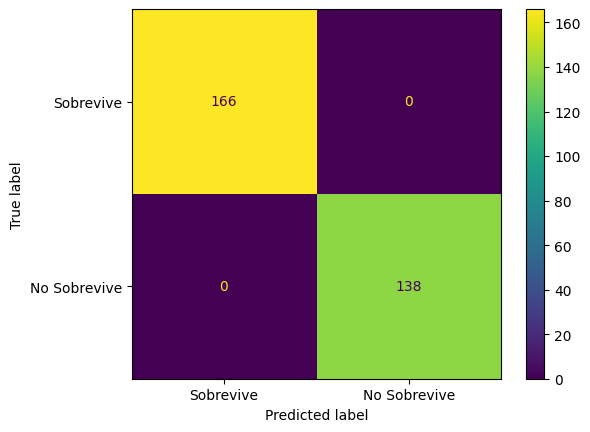

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Sobrevive','No Sobrevive']).plot(values_format='d')

MEJORA- Muerte por cancer

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['death_from_cancer (2)'],
                                                    test_size=0.2, random_state=63
                                                    )

In [13]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc: 0.8355263157894737
precision: 0.7887652358240594
recall: 0.789272030651341
f1: 0.8355263157894737


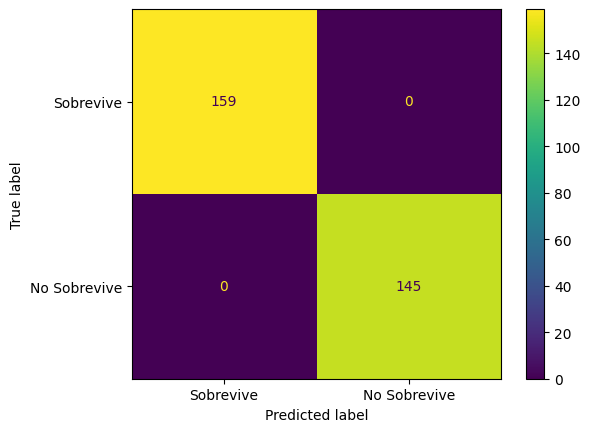

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Sobrevive','No Sobrevive']).plot(values_format='d')

Quimioterapia

In [15]:
X = df.copy()
X = X.drop(['chemotherapy'], axis=1)
X

,age_at_diagnosis,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,...,her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
0,43,1,3,1,0,2,0.000065,8.466155e-01,1,1,...,0,0,1,0,0,0,1,1,0,0.000276
1,76,1,3,1,8,2,0.000099,4.138046e-01,0,1,...,0,1,0,2,0,1,1,1,1,0.002373
2,78,1,3,1,0,4,0.006730,7.802601e-09,0,1,...,0,0,0,3,1,0,1,1,1,0.003653
3,86,1,3,1,1,5,0.008339,3.657886e-01,0,1,...,0,0,0,2,0,0,0,1,2,0.000916
4,84,1,2,0,0,1,0.005066,3.627876e-01,0,0,...,0,2,0,1,1,0,0,1,1,0.001644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,67,4,2,1,1,3,0.000065,2.410804e-08,0,0,...,0,0,0,1,1,0,1,5,2,0.012834
1512,63,4,2,1,6,6,0.000083,1.955985e-01,1,0,...,0,0,0,3,1,0,1,4,0,0.023726
1513,61,4,3,1,1,5,0.000082,2.030677e-08,0,0,...,0,0,0,10,0,0,0,5,2,0.012834
1514,66,4,3,1,3,2,0.000082,1.586862e-01,0,0,...,0,0,0,1,1,0,0,4,2,0.036559


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['chemotherapy'],
                                                    test_size=0.2, random_state=42
                                                    )

In [ ]:
X_train

,age_at_diagnosis,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,...,her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
257,57,1,2,0,0,1,0.000049,8.692898e-09,1,1,...,0,0,0,1,0,0,1,5,0,0.000428
577,43,2,3,1,0,6,0.006720,2.372124e-01,1,1,...,1,0,1,8,1,0,0,4,0,0.000792
1087,68,3,3,0,0,4,0.000065,1.946315e-01,1,1,...,0,0,0,7,1,0,0,0,0,0.000579
1224,51,3,3,1,1,7,0.008375,2.100700e-09,0,1,...,0,1,0,1,0,1,0,0,1,0.019038
861,63,3,1,0,0,8,0.003457,5.275092e-01,0,1,...,0,5,0,8,0,5,0,4,1,0.002555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,43,3,3,0,13,5,0.000098,1.563855e-01,0,1,...,0,0,1,4,1,0,0,0,1,0.001159
1103,49,3,1,0,0,6,0.000032,2.405135e-01,1,1,...,0,1,1,3,1,1,1,5,0,0.000385
406,68,2,1,0,0,4,0.003378,2.344115e-01,0,0,...,0,0,0,6,0,0,1,5,2,0.000549
1029,66,3,2,1,1,7,0.006707,1.023341e-08,0,1,...,0,1,0,9,0,1,0,4,1,0.001341


In [17]:
X_test

,age_at_diagnosis,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,...,her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
51,62,1,1,0,0,2,0.003344,5.901967e-09,1,1,...,0,0,0,0,1,0,0,5,0,0.000246
168,78,1,3,1,6,1,0.010020,1.311771e-01,1,1,...,1,0,0,5,0,0,0,6,0,0.001280
1469,76,4,3,1,0,6,0.000066,1.680560e-08,0,0,...,0,1,0,10,0,1,1,4,2,0.015892
926,31,3,3,0,0,2,0.006634,1.708903e-01,1,0,...,0,0,1,1,1,0,0,0,0,0.000003
422,64,2,2,1,1,2,0.000066,4.044682e-01,0,0,...,0,0,0,8,1,0,1,4,2,0.001766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,78,1,8,1,0,1,0.001696,1.698900e-01,0,1,...,0,0,0,1,1,0,1,5,2,0.000337
1329,56,5,2,1,2,8,0.000065,2.210737e-08,1,1,...,0,0,0,1,1,0,0,4,0,0.000522
793,74,3,2,0,0,8,0.000049,3.981327e-09,0,0,...,0,0,0,5,1,0,0,6,1,0.002373
998,40,3,3,0,0,10,0.000065,2.020007e-01,0,1,...,0,6,1,0,1,0,0,4,1,0.000579


In [18]:
y_train

1280    0
1334    0
601     0
590     1
718     0
       ..
1130    0
1294    0
860     0
1459    0
1126    0
Name: chemotherapy, Length: 1212, dtype: int64

In [19]:
y_test


51      0
168     0
1469    0
926     0
422     0
       ..
111     0
1329    0
793     0
998     0
869     0
Name: chemotherapy, Length: 304, dtype: int64

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc: 0.9539473684210527
precision: 0.9371418941691945
recall: 0.8959096459096458
f1: 0.9539473684210527


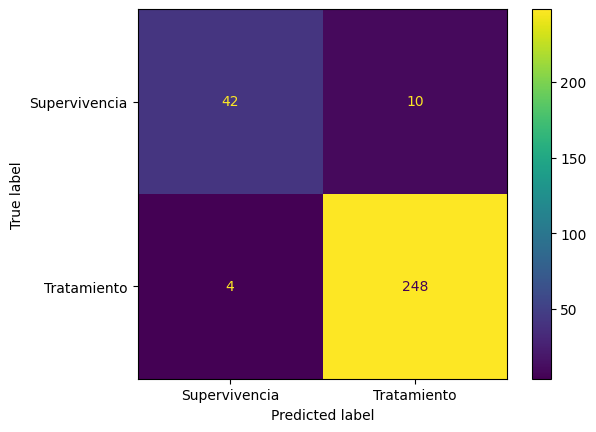

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Supervivencia','Tratamiento']).plot(values_format='d')

In [ ]:
MEJORA-quimioterapia

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['chemotherapy'],
                                                    test_size=0.2, random_state=57
                                                    )

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc: 0.9638157894736842
precision: 0.9381889763779527
recall: 0.9312950476633342
f1: 0.9638157894736842


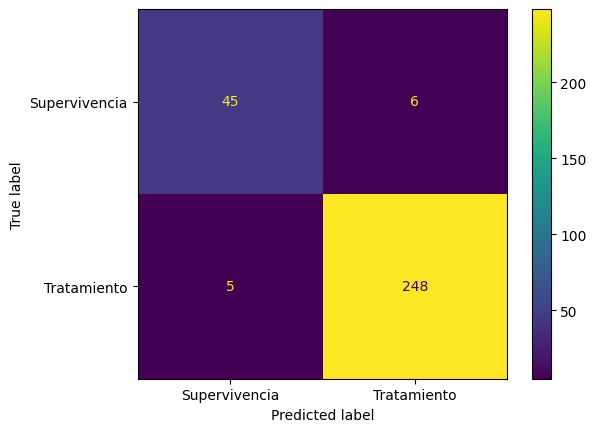

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Supervivencia','Tratamiento']).plot(values_format='d')

tumor_otro_subtipo_histológico(2)

In [28]:
X = df.copy()
X = X.drop(['tumor_other_histologic_subtype (2)'], axis=1)
X

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,her2_status_measured_by_snp6 (2),her2_status (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
0,43,0,1,3,1,0,2,0.000065,8.466155e-01,1,...,0,0,1,0,0,0,1,1,0,0.000276
1,76,1,1,3,1,8,2,0.000099,4.138046e-01,0,...,0,0,0,2,0,1,1,1,1,0.002373
2,78,0,1,3,1,0,4,0.006730,7.802601e-09,0,...,0,0,0,3,1,0,1,1,1,0.003653
3,86,0,1,3,1,1,5,0.008339,3.657886e-01,0,...,2,0,0,2,0,0,0,1,2,0.000916
4,84,0,1,2,0,0,1,0.005066,3.627876e-01,0,...,1,0,0,1,1,0,0,1,1,0.001644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,67,0,4,2,1,1,3,0.000065,2.410804e-08,0,...,0,0,0,1,1,0,1,5,2,0.012834
1512,63,0,4,2,1,6,6,0.000083,1.955985e-01,1,...,0,0,0,3,1,0,1,4,0,0.023726
1513,61,0,4,3,1,1,5,0.000082,2.030677e-08,0,...,0,0,0,10,0,0,0,5,2,0.012834
1514,66,0,4,3,1,3,2,0.000082,1.586862e-01,0,...,0,0,0,1,1,0,0,4,2,0.036559


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['tumor_other_histologic_subtype (2)'],
                                                    test_size=0.2, random_state=42
                                                    )

In [30]:
X_train

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,her2_status_measured_by_snp6 (2),her2_status (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
1280,38,0,5,2,1,0,2,0.005032,1.940313e-01,1,...,1,0,1,0,0,0,1,5,0,0.007782
1334,49,0,5,3,0,0,7,0.006704,1.478159e-01,0,...,2,0,1,8,1,0,0,5,1,0.023686
601,51,0,2,3,1,0,6,0.000065,2.280760e-08,1,...,0,0,0,0,1,0,1,5,0,0.000428
590,51,1,2,3,0,2,8,0.000084,3.804602e-01,0,...,2,0,0,8,0,0,0,4,1,0.004800
718,44,0,3,1,1,0,4,0.003643,1.983995e-01,0,...,0,0,1,0,0,2,1,5,1,0.005953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,80,0,3,3,1,2,2,0.000082,3.181060e-09,0,...,0,0,0,2,1,0,0,4,2,0.001766
1294,64,0,5,2,0,0,1,0.000049,2.550183e-01,1,...,0,0,0,7,1,0,0,0,0,0.015067
860,46,0,3,3,0,0,5,0.000065,1.899300e-01,1,...,0,0,1,1,0,1,1,5,0,0.001462
1459,52,0,4,8,1,0,2,0.005036,1.353785e-01,1,...,0,0,0,2,1,0,1,4,0,0.010434


In [31]:
X_test

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,her2_status_measured_by_snp6 (2),her2_status (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
51,62,0,1,1,0,0,2,0.003344,5.901967e-09,1,...,0,0,0,0,1,0,0,5,0,0.000246
168,78,0,1,3,1,6,1,0.010020,1.311771e-01,1,...,2,1,0,5,0,0,0,6,0,0.001280
1469,76,0,4,3,1,0,6,0.000066,1.680560e-08,0,...,0,0,0,10,0,1,1,4,2,0.015892
926,31,0,3,3,0,0,2,0.006634,1.708903e-01,1,...,2,0,1,1,1,0,0,0,0,0.000003
422,64,0,2,2,1,1,2,0.000066,4.044682e-01,0,...,2,0,0,8,1,0,1,4,2,0.001766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,78,0,1,8,1,0,1,0.001696,1.698900e-01,0,...,0,0,0,1,1,0,1,5,2,0.000337
1329,56,0,5,2,1,2,8,0.000065,2.210737e-08,1,...,0,0,0,1,1,0,0,4,0,0.000522
793,74,0,3,2,0,0,8,0.000049,3.981327e-09,0,...,2,0,0,5,1,0,0,6,1,0.002373
998,40,0,3,3,0,0,10,0.000065,2.020007e-01,0,...,0,0,1,0,1,0,0,4,1,0.000579


In [32]:
y_train

1280    0
1334    0
601     0
590     6
718     2
       ..
1130    0
1294    6
860     1
1459    0
1126    0
Name: tumor_other_histologic_subtype (2), Length: 1212, dtype: int64

In [33]:
y_test

51      0
168     0
1469    1
926     0
422     0
       ..
111     0
1329    0
793     0
998     6
869     0
Name: tumor_other_histologic_subtype (2), Length: 304, dtype: int64

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc: 0.9506578947368421
precision: 0.5489154493138557
recall: 0.5403874269005848
f1: 0.9506578947368421


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


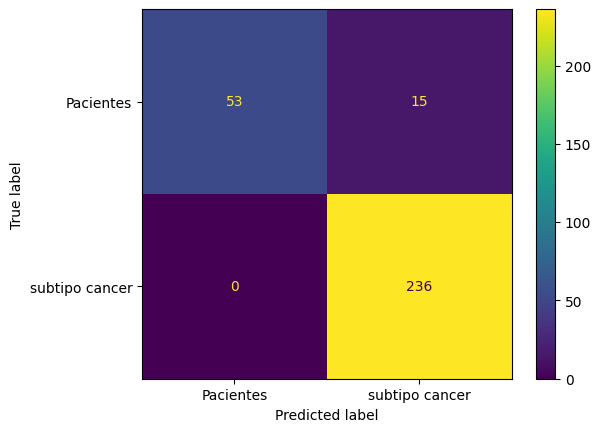

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Pacientes','subtipo cancer']).plot(values_format='d')

MEJORA-tumor_otro_subtipo_histológico(2)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['tumor_other_histologic_subtype (2)'],
                                                    test_size=0.2, random_state=52
                                                    )

In [52]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc: 0.9539473684210527
precision: 0.6844484629294756
recall: 0.549223602484472
f1: 0.9539473684210527


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


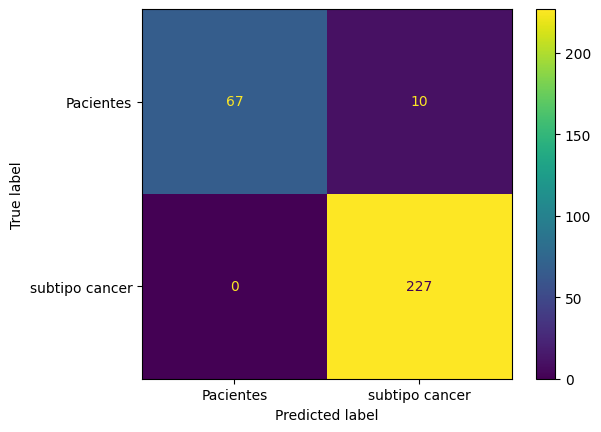

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Pacientes','subtipo cancer']).plot(values_format='d')

Terapia hormonal

In [91]:
X = df.copy()
X = X.drop(['hormone_therapy'], axis=1)
X

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,...,her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
0,43,0,1,3,0,2,0.000065,8.466155e-01,1,1,...,0,0,1,0,0,0,1,1,0,0.000276
1,76,1,1,3,8,2,0.000099,4.138046e-01,0,1,...,0,1,0,2,0,1,1,1,1,0.002373
2,78,0,1,3,0,4,0.006730,7.802601e-09,0,1,...,0,0,0,3,1,0,1,1,1,0.003653
3,86,0,1,3,1,5,0.008339,3.657886e-01,0,1,...,0,0,0,2,0,0,0,1,2,0.000916
4,84,0,1,2,0,1,0.005066,3.627876e-01,0,0,...,0,2,0,1,1,0,0,1,1,0.001644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,67,0,4,2,1,3,0.000065,2.410804e-08,0,0,...,0,0,0,1,1,0,1,5,2,0.012834
1512,63,0,4,2,6,6,0.000083,1.955985e-01,1,0,...,0,0,0,3,1,0,1,4,0,0.023726
1513,61,0,4,3,1,5,0.000082,2.030677e-08,0,0,...,0,0,0,10,0,0,0,5,2,0.012834
1514,66,0,4,3,3,2,0.000082,1.586862e-01,0,0,...,0,0,0,1,1,0,0,4,2,0.036559


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['hormone_therapy'],
                                                    test_size=0.2, random_state=42
                                                    )

In [106]:
X_test

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,...,her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
1452,67,0,4,3,3,11,0.000082,5.695232e-01,0,0,...,0,0,0,6,1,0,0,4,1,0.008829
625,59,0,3,2,0,8,0.005016,2.981327e-01,0,0,...,0,1,0,6,1,1,1,4,2,0.000367
479,63,0,2,3,0,4,0.000065,1.870957e-01,1,1,...,0,0,0,7,0,0,0,0,0,0.000579
299,74,1,1,3,14,3,0.010023,5.951984e-09,0,1,...,0,0,0,0,1,0,1,4,1,0.001341
1345,75,0,5,3,0,4,0.000065,1.050350e-08,0,0,...,0,0,0,7,0,0,0,0,2,0.011590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,61,0,2,3,0,8,0.006671,2.620874e-08,1,0,...,0,0,0,3,0,0,0,4,0,0.000337
1095,49,0,3,2,0,9,0.000049,1.587196e-01,0,1,...,0,0,1,0,1,0,1,0,1,0.000428
380,57,0,2,2,0,3,0.000049,5.971991e-09,0,1,...,1,0,0,5,1,0,0,6,1,0.000579
539,69,0,2,2,1,5,0.000066,1.911971e-01,0,1,...,1,0,0,3,0,0,0,5,2,0.002069


In [107]:
y_train

873     0
260     1
466     1
569     1
275     1
       ..
70      1
132     1
1313    1
109     1
1504    0
Name: hormone_therapy, Length: 1212, dtype: int64

In [108]:
y_test

1452    1
625     0
479     1
299     1
1345    0
       ..
482     1
1095    0
380     0
539     1
103     1
Name: hormone_therapy, Length: 304, dtype: int64

In [109]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc: 0.7927631578947368
precision: 0.7764260980499362
recall: 0.7832002987443403
f1: 0.7927631578947368


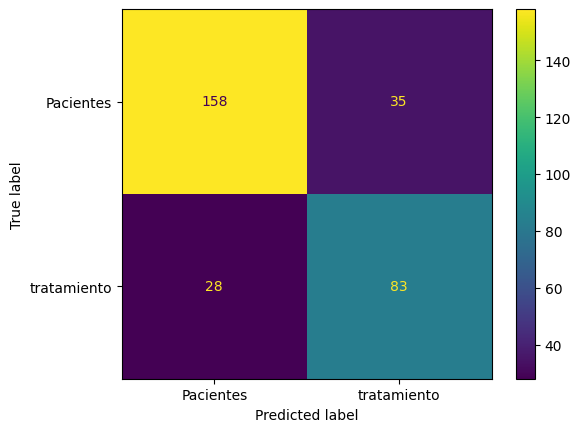

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Pacientes','tratamiento']).plot(values_format='d')

In [ ]:
MEJORA- terapia hormonal

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['hormone_therapy'],
                                                    test_size=0.2, random_state=50
                                                    )

In [103]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc: 0.819078947368421
precision: 0.807226170949517
recall: 0.8102369450195537
f1: 0.819078947368421


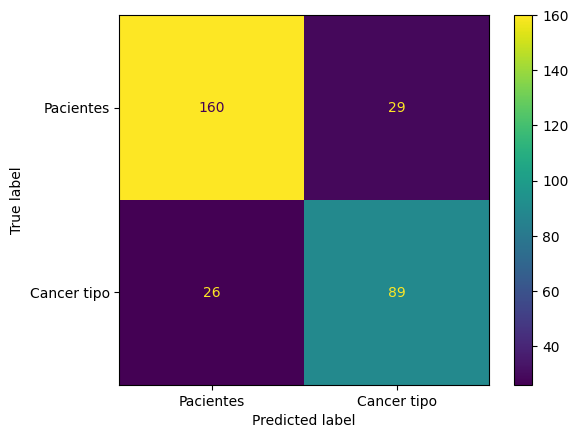

In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
confusion = multilabel_confusion_matrix(y_test,y_pred)
print(f"acc: {accuracy_score(y_test,y_pred)}")
print(f"precision: {precision_score(y_test,y_pred,average='macro')}")
print(f"recall: {recall_score(y_test,y_pred,average='macro')}")
print(f"f1: {f1_score(y_test,y_pred,average='micro')}")
confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['Pacientes','Cancer tipo']).plot(values_format='d')